## 통계청 출생아수(시도/시/군/구)
http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=INH_1B81A01&vw_cd=MT_GTITLE01&list_id=101&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_GTITLE01

In [1]:
import pandas as pd

In [2]:
df_kosis = pd.read_csv("data/population_kosis_1997_2018.csv", encoding="cp949")
df_kosis.shape

(19, 793)

In [3]:
df_kosis.head()

,시군구별,1997. 01,1997. 01.1,1997. 01.2,1997. 02,1997. 02.1,1997. 02.2,1997. 03,1997. 03.1,1997. 03.2,...,2018. 09.2,2018. 10,2018. 10.1,2018. 10.2,2018. 11,2018. 11.1,2018. 11.2,2018. 12,2018. 12.1,2018. 12.2
0,시군구별,계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),...,여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명)
1,전국,63268,33266,30002,58144,30086,28058,62160,32333,29827,...,12557,26474,13601,12873,25301,13014,12287,22767,11686,11081
2,서울특별시,13205,6886,6319,12239,6224,6015,13358,6947,6411,...,2247,4689,2466,2223,4571,2369,2202,4110,2145,1965
3,부산광역시,4201,2260,1941,3910,2104,1806,4304,2234,2070,...,713,1525,792,733,1439,732,707,1285,629,656
4,대구광역시,3345,1764,1581,2994,1608,1386,3337,1815,1522,...,537,1151,587,564,1067,543,524,1002,525,477


### Tidy Data
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_melt.png">
이미지 출처 : https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

In [4]:
df_kosis.head()

,시군구별,1997. 01,1997. 01.1,1997. 01.2,1997. 02,1997. 02.1,1997. 02.2,1997. 03,1997. 03.1,1997. 03.2,...,2018. 09.2,2018. 10,2018. 10.1,2018. 10.2,2018. 11,2018. 11.1,2018. 11.2,2018. 12,2018. 12.1,2018. 12.2
0,시군구별,계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),...,여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명)
1,전국,63268,33266,30002,58144,30086,28058,62160,32333,29827,...,12557,26474,13601,12873,25301,13014,12287,22767,11686,11081
2,서울특별시,13205,6886,6319,12239,6224,6015,13358,6947,6411,...,2247,4689,2466,2223,4571,2369,2202,4110,2145,1965
3,부산광역시,4201,2260,1941,3910,2104,1806,4304,2234,2070,...,713,1525,792,733,1439,732,707,1285,629,656
4,대구광역시,3345,1764,1581,2994,1608,1386,3337,1815,1522,...,537,1151,587,564,1067,543,524,1002,525,477


In [5]:
df_kosis.columns

Index(['시군구별', '1997. 01', '1997. 01.1', '1997. 01.2', '1997. 02',
       '1997. 02.1', '1997. 02.2', '1997. 03', '1997. 03.1', '1997. 03.2',
       ...
       '2018. 09.2', '2018. 10', '2018. 10.1', '2018. 10.2', '2018. 11',
       '2018. 11.1', '2018. 11.2', '2018. 12', '2018. 12.1', '2018. 12.2'],
      dtype='object', length=793)

In [6]:
df = df_kosis.melt(id_vars="시군구별")

In [7]:
df["시군구별"].unique()

array(['시군구별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [8]:
df.shape
df = df[df["시군구별"] != "시군구별"].copy()
df.shape

(14256, 3)

In [9]:
df["연도"] = df["variable"].str.split(".", expand=True)[0]
df["월"] = df["variable"].str.split(".", expand=True)[1]
df["성별"] = df["variable"].str.split(".", expand=True)[2]
df.head()

,시군구별,variable,value,연도,월,성별
1,전국,1997. 01,63268,1997,01,None
2,서울특별시,1997. 01,13205,1997,01,None
3,부산광역시,1997. 01,4201,1997,01,None
4,대구광역시,1997. 01,3345,1997,01,None
5,인천광역시,1997. 01,3646,1997,01,None


In [10]:
df["성별"].value_counts()

1    4752
2    4752
Name: 성별, dtype: int64

In [11]:
df["성별"] = df["성별"].fillna("전체")

In [12]:
df["성별"].value_counts()

1     4752
2     4752
전체    4752
Name: 성별, dtype: int64

In [13]:
df["성별"] = df["성별"].replace("1", "남").replace("2", "여")
df["성별"].value_counts()

남     4752
여     4752
전체    4752
Name: 성별, dtype: int64

In [22]:
df = df.rename(columns={"variable":"기간", "value":"출생아수"})
df.head()

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997. 01,63268,1997,01,전체
2,서울특별시,1997. 01,13205,1997,01,전체
3,부산광역시,1997. 01,4201,1997,01,전체
4,대구광역시,1997. 01,3345,1997,01,전체
5,인천광역시,1997. 01,3646,1997,01,전체


### 시각화

In [60]:
import seaborn as sns
# sns.set(font="Malgun Gothic", rc={"axes.unicode_minus": False})
sns.set(font="AppleGothic", rc={"axes.unicode_minus": False})
%config InlineBackend.figure_format='retina'

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14256 entries, 1 to 15047
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구별    14256 non-null  object 
 1   기간      14256 non-null  object 
 2   출생아수    13716 non-null  float64
 3   연도      14256 non-null  object 
 4   월       14256 non-null  object 
 5   성별      14256 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.4+ MB


In [62]:
df["출생아수"].unique()

array([63268., 13205.,  4201., ...,   137.,  3010.,   159.])

In [63]:
# df["출생아수"].astype(int)

In [64]:
df["출생아수"] = df["출생아수"].replace("-", np.nan)

In [65]:
df["출생아수"] = pd.to_numeric(df["출생아수"])

In [66]:
df_all = df[(df["성별"] == "전체") & (df["시군구별"] == "전국")]

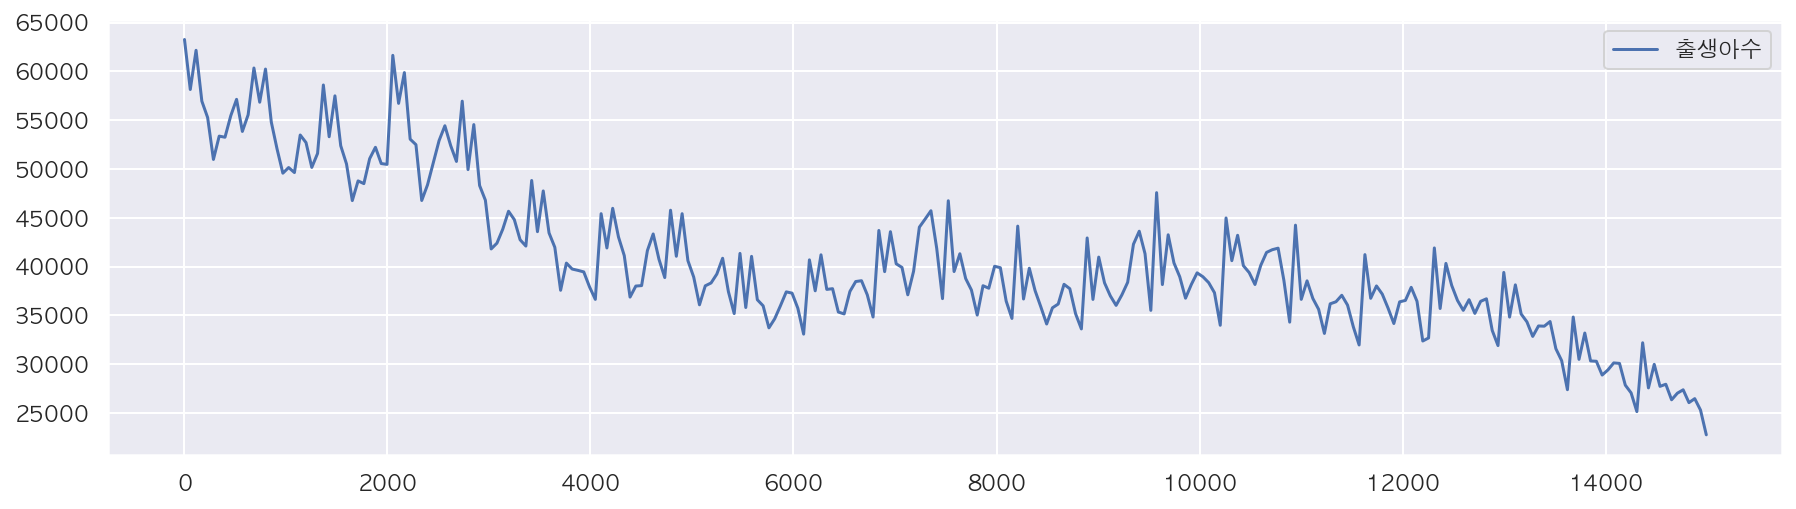

In [67]:
df_all[["연도", "출생아수"]].plot(figsize=(15, 4))

In [68]:
year_birth = df_all[["연도", "출생아수"]]
year_birth = year_birth.set_index("연도")
year_birth.head()

,출생아수
연도,
1997,63268.0
1997,58144.0
1997,62160.0
1997,56949.0
1997,55270.0


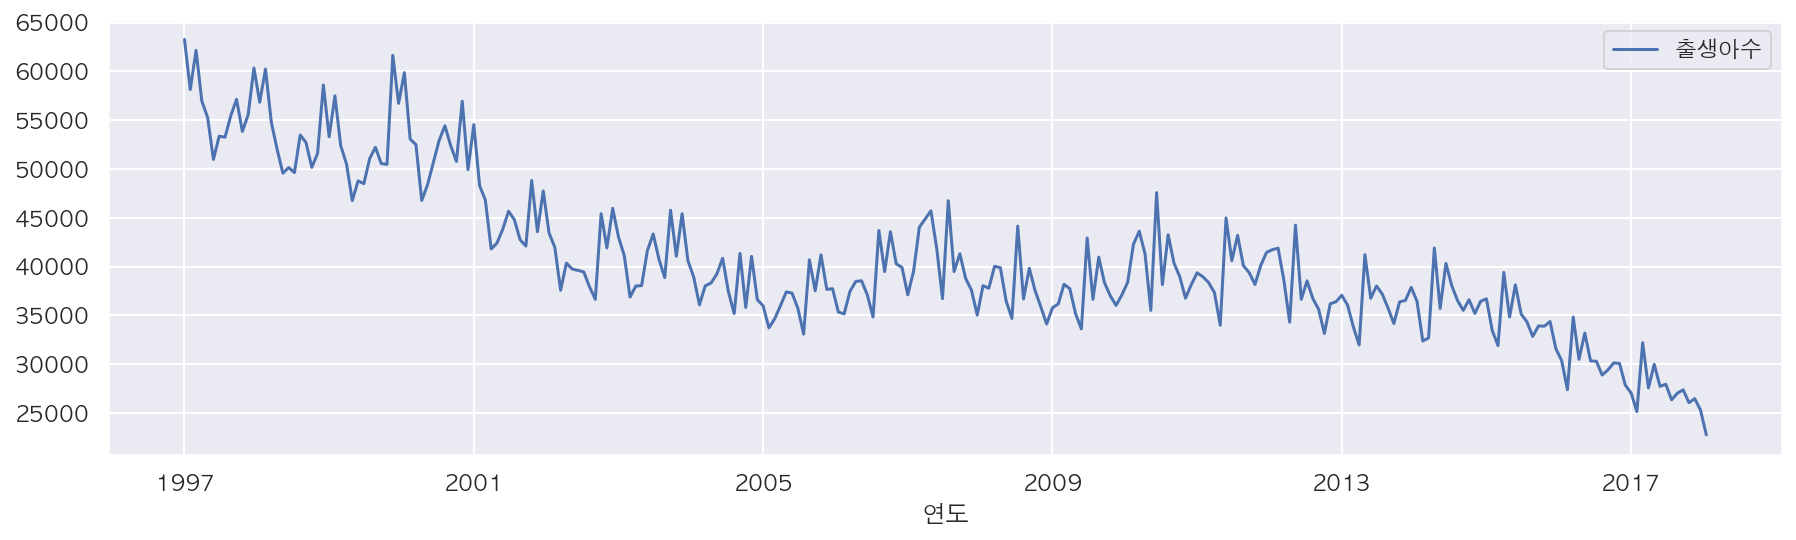

In [69]:
year_birth.plot(figsize=(15, 4))